### .mat -> .npy

In [1]:
import os
import numpy as np
import matplotlib.pylab as plt
import scipy.io

mat_dir_path = os.path.join(os.getcwd(),'data_preprocessed_matlab')
mat_file_list = os.listdir(mat_dir_path)
print(mat_file_list)

['s01.mat', 's02.mat', 's03.mat', 's04.mat', 's05.mat', 's06.mat', 's07.mat', 's08.mat', 's09.mat', 's10.mat', 's11.mat', 's12.mat', 's13.mat', 's14.mat', 's15.mat', 's16.mat', 's17.mat', 's18.mat', 's19.mat', 's20.mat', 's21.mat', 's22.mat', 's23.mat', 's24.mat', 's25.mat', 's26.mat', 's27.mat', 's28.mat', 's29.mat', 's30.mat', 's31.mat', 's32.mat']


In [6]:
file['data'].shape

(40, 40, 8064)

In [10]:
mat_data = []
mat_target = []
for name in mat_file_list:
    print(name)
    file = scipy.io.loadmat(mat_dir_path +"/"+ name)
    print("원본 파일 shape :", file['data'].shape)
    tmp_data = np.delete(file['data'], [32,33,34,35,36,37,38,39], axis = 1) # 근육 채널들 제거
    print("근육 채널 제거 후 파일 shape :", tmp_data.shape)
    mat_data.extend(tmp_data)
    mat_target.extend(file['labels'])
#    print(tmp_data.shape)
#    print(file['labels'].shape)

s01.mat
원본 파일 shape : (40, 40, 8064)
근육 채널 제거 후 파일 shape : (40, 32, 8064)
s02.mat
원본 파일 shape : (40, 40, 8064)
근육 채널 제거 후 파일 shape : (40, 32, 8064)
s03.mat
원본 파일 shape : (40, 40, 8064)
근육 채널 제거 후 파일 shape : (40, 32, 8064)
s04.mat
원본 파일 shape : (40, 40, 8064)
근육 채널 제거 후 파일 shape : (40, 32, 8064)
s05.mat
원본 파일 shape : (40, 40, 8064)
근육 채널 제거 후 파일 shape : (40, 32, 8064)
s06.mat
원본 파일 shape : (40, 40, 8064)
근육 채널 제거 후 파일 shape : (40, 32, 8064)
s07.mat
원본 파일 shape : (40, 40, 8064)
근육 채널 제거 후 파일 shape : (40, 32, 8064)
s08.mat
원본 파일 shape : (40, 40, 8064)
근육 채널 제거 후 파일 shape : (40, 32, 8064)
s09.mat
원본 파일 shape : (40, 40, 8064)
근육 채널 제거 후 파일 shape : (40, 32, 8064)
s10.mat
원본 파일 shape : (40, 40, 8064)
근육 채널 제거 후 파일 shape : (40, 32, 8064)
s11.mat
원본 파일 shape : (40, 40, 8064)
근육 채널 제거 후 파일 shape : (40, 32, 8064)
s12.mat
원본 파일 shape : (40, 40, 8064)
근육 채널 제거 후 파일 shape : (40, 32, 8064)
s13.mat
원본 파일 shape : (40, 40, 8064)
근육 채널 제거 후 파일 shape : (40, 32, 8064)
s14.mat
원본 파일 shape : (40, 40, 8064)
근

- 40개 비디오
- 32개 채널
- 8064개 데이터

In [11]:
mat_data = np.array(mat_data)
mat_target = np.array(mat_target)
print(mat_data.shape) # (1280, 32, 8064) 1280 = 32 * 40
print(mat_target.shape) # (1280, 4)

#저장
np.save(os.path.join(os.getcwd(),'DEAP_data_eeg'), mat_data)
np.save(os.path.join(os.getcwd(), 'DEAP_label'), mat_target)

(1280, 32, 8064)
(1280, 4)


In [12]:
mat_data

array([[[ 9.48231681e-01,  1.65333533e+00,  3.01372577e+00, ...,
         -2.82648937e+00, -4.47722969e+00, -3.67692812e+00],
        [ 1.24706590e-01,  1.39008270e+00,  1.83509881e+00, ...,
         -2.98702069e+00, -6.28780884e+00, -4.47429041e+00],
        [-2.21651099e+00,  2.29201682e+00,  2.74636923e+00, ...,
         -2.63707760e+00, -7.40651010e+00, -6.75590441e+00],
        ...,
        [-3.55718623e+00, -1.26030574e+00, -3.09961982e+00, ...,
          6.68885999e+00,  6.91232131e+00,  5.66901722e+00],
        [-1.23733173e+00, -9.41382861e-01,  1.02804718e+00, ...,
          2.64017310e+00,  6.57464869e+00,  7.20846274e+00],
        [ 3.72270628e-01,  2.07619495e+00,  4.46521875e+00, ...,
          2.23958511e+00,  3.18256605e+00,  4.70807159e+00]],

       [[ 1.02601750e+01,  1.27954427e+01,  1.04261916e+01, ...,
          6.02219406e+00,  7.53913583e+00,  9.35224904e+00],
        [ 9.49186875e+00,  1.25897704e+01,  1.05740268e+01, ...,
          6.03399490e+00,  9.06874552e

## data load

In [8]:
data = np.load('DEAP_data_eeg.npy')
label = np.load('DEAP_label.npy')
label = label[:, :2] # valence, arousal
val, aro = label[:, 0], label[:, 1]

print('data shape :', data.shape)
print('label shape :', label.shape)
print('val shape :', val.shape)
print('aro shape :', aro.shape)

data shape : (1280, 32, 8064)
label shape : (1280, 2)
val shape : (1280,)
aro shape : (1280,)


In [9]:
# only eeg channel data
data_eeg = np.load('DEAP_data_eeg.npy')
print('data_eeg shape :', data_eeg.shape)

data_eeg shape : (1280, 32, 8064)


<tbody><tr><th>Array name</th><th>Array shape</th><th>Array contents</th></tr>
       <tr><td>data</td><td>40 x 40 x 8064</td><td>video/trial x channel x data</td></tr>
       <tr><td>labels</td><td>40 x 4</td><td>video/trial x label (valence, arousal, dominance, liking)</td></tr>
</tbody>

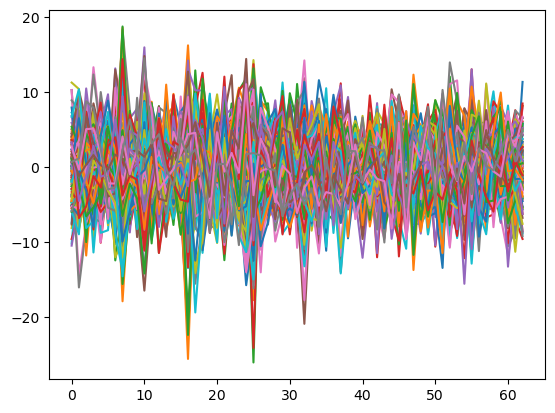

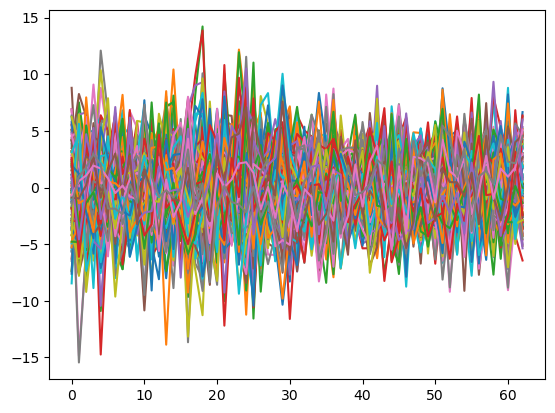

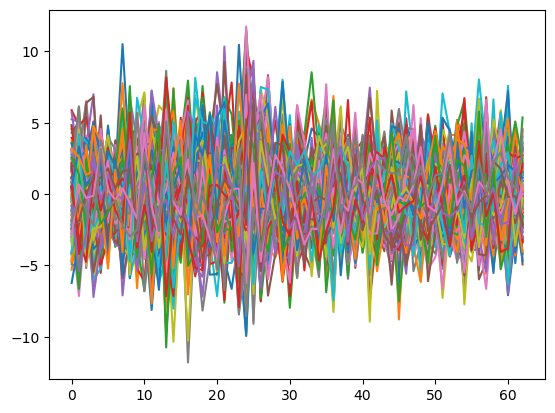

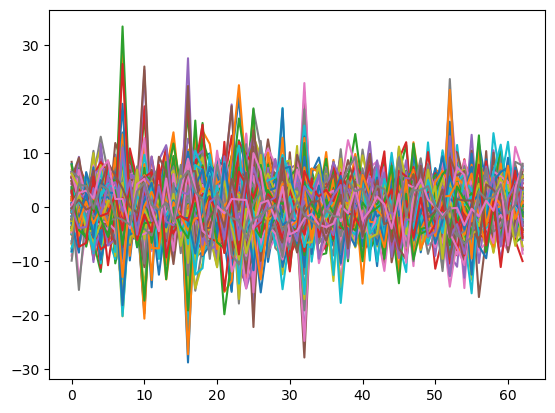

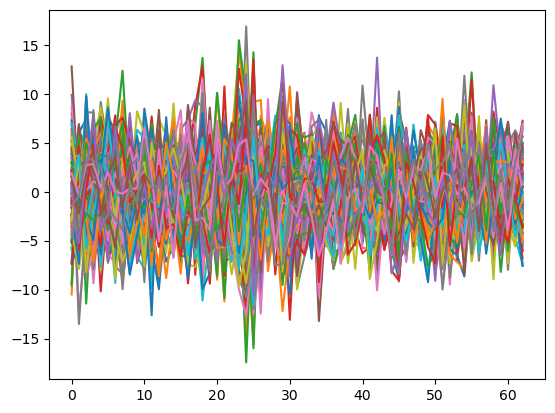

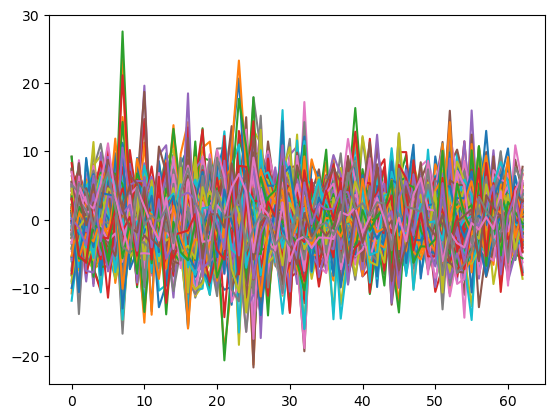

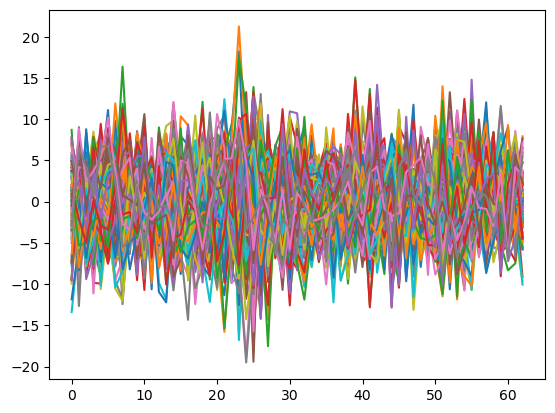

IndexError: index 32 is out of bounds for axis 0 with size 32

In [14]:
data_num = 0
channel_range = np.arange(40)

for channel in channel_range[25:]:
    sam = data[data_num][channel].reshape(63,-1) # 0번째 데이터의 0번째 채널
    plt.plot(sam) # 63초 동안 찍힌 것(1초에 128개씩)
#    plt.ylim([data_eeg_min, data_eeg_max])
    plt.show()

<!img="frequency.jpg">

뇌파는 진동하는 주파수의 범위에 따라 인위적으로 
- 델타 -δ파(0.2 ~ 3.99 Hz)
- 쎄타 -θ파(4 ~ 7.99 Hz)
- 알파 -α파(8 ~ 12.99 Hz)
- 베타 -β파(13 ~ 29.99 Hz)
- 감마- g파(30~50 Hz)
로 구분한다.

In [25]:
import mne
sfreq = 128 # 샘플링 주파수
alpha_fir = mne.filter.filter_data(data_eeg, sfreq, 8, 13, method='fir') # 8, 13은 알파 주파수 대역
# sfreq : The sample frequency in Hz.
# method : 'fir’ will use overlap-add FIR filtering
beta_fir = mne.filter.filter_data(data_eeg, sfreq, 13, 30, method='fir') # 13, 30은 베타 주파수 대역
print(alpha_fir.shape)

Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 213 samples (1.664 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 40960 out of 40960 | elapsed:   43.4s finished


Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 131 samples (1.023 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 40960 out of 40960 | elapsed:  1.4min finished


(1280, 32, 8064)


Setting up high-pass filter at 2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Filter length: 213 samples (1.664 s)



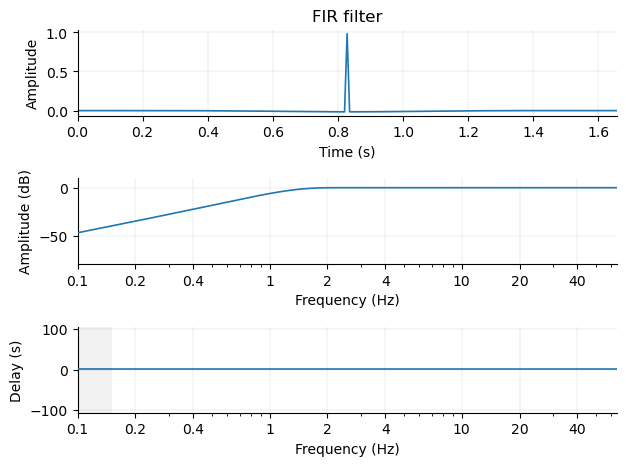

Figure(640x480)


In [26]:
alpha_filter_params = mne.filter.create_filter(
    alpha_fir, 128, l_freq=2.0, h_freq=None
)
print(mne.viz.plot_filter(alpha_filter_params, sfreq))

Setting up high-pass filter at 3.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.25
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.25 Hz)
- Filter length: 213 samples (1.664 s)



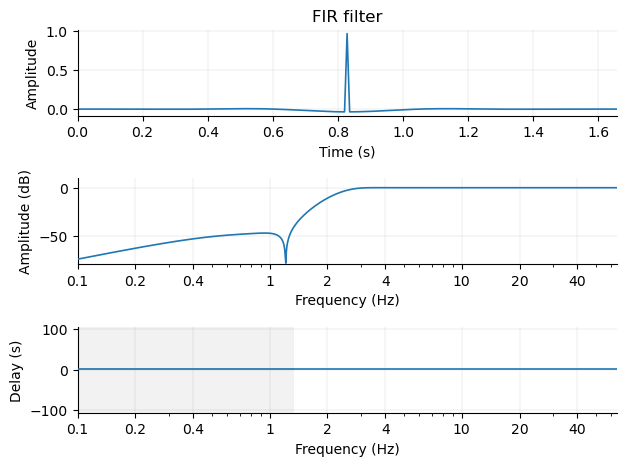

Figure(640x480)


In [27]:
beta_filter_params = mne.filter.create_filter(
    beta_fir, 128, l_freq=3.25, h_freq=None
)
print(mne.viz.plot_filter(beta_filter_params, sfreq))

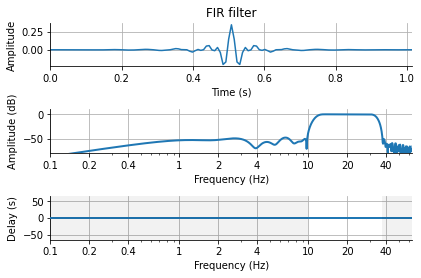

Figure(432x288)


In [7]:
print(mne.viz.plot_filter(beta_filter_params, sfreq))

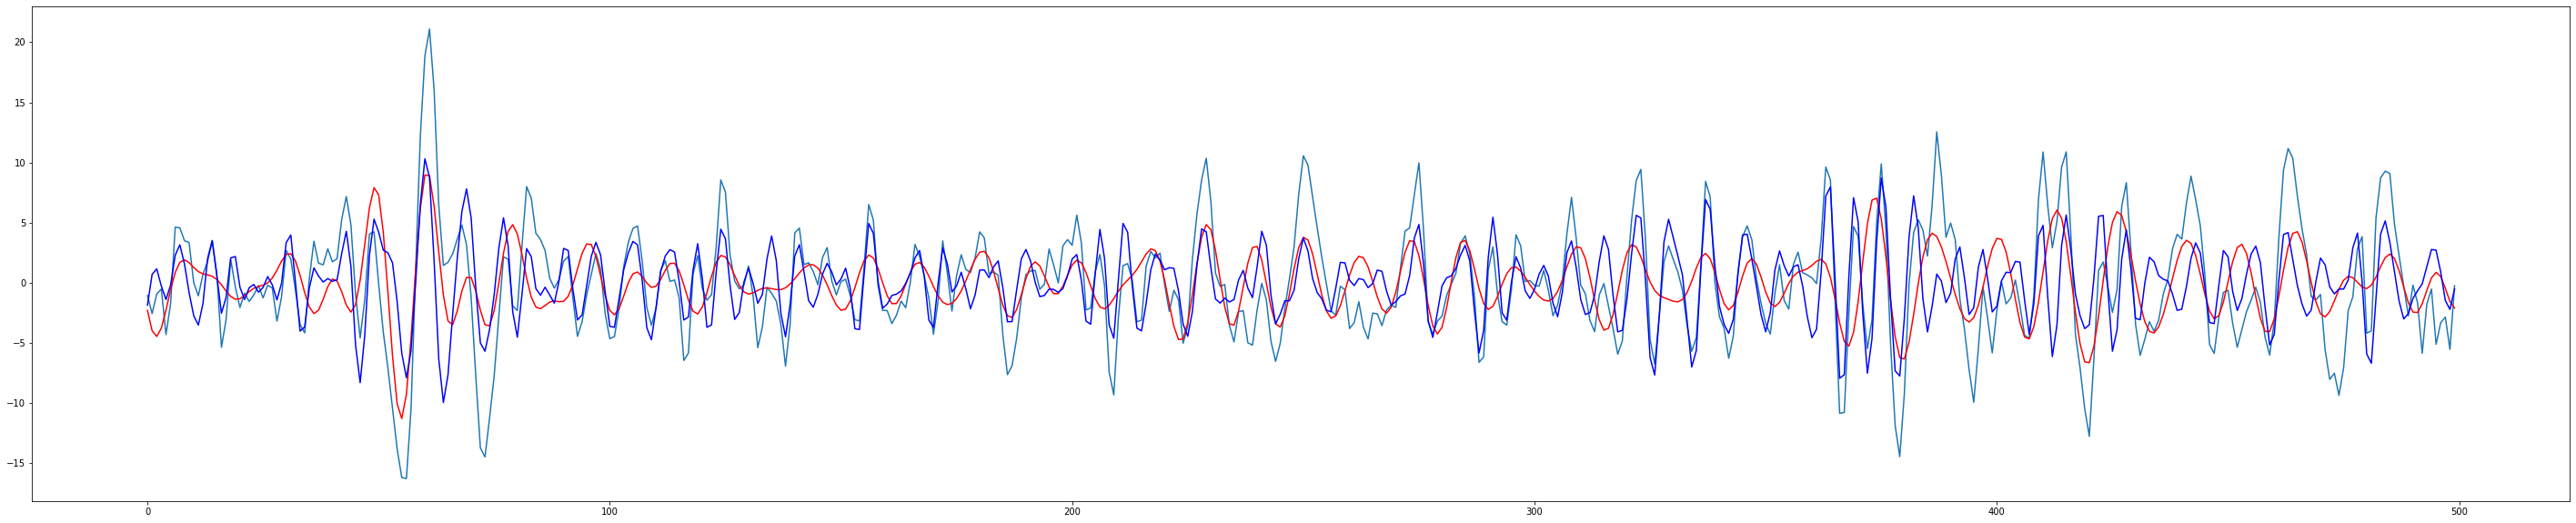

In [27]:
where = 1
channel = 2
plt.figure(figsize=(50,10))
plt.plot(data_eeg[where, channel, 5000:5500])
plt.plot(alpha_fir[where, channel, 5000:5500], c='r')
plt.plot(beta_fir[where, channel, 5000:5500], c='b')
plt.show()

In [5]:
alpha_mean = np.mean(alpha_fir, axis=2)
beta_mean = np.mean(beta_fir, axis=2)
print(alpha_mean.shape, beta_mean.shape)

(1280, 32) (1280, 32)


[<matplotlib.lines.Line2D object at 0x0000024F4D6BB808>, <matplotlib.lines.Line2D object at 0x0000024F4D6B0F48>, <matplotlib.lines.Line2D object at 0x0000024F4D6DDB88>, <matplotlib.lines.Line2D object at 0x0000024F4D6DDD88>, <matplotlib.lines.Line2D object at 0x0000024F4D6DDFC8>, <matplotlib.lines.Line2D object at 0x0000024F4D6EA248>, <matplotlib.lines.Line2D object at 0x0000024F4D6EA448>, <matplotlib.lines.Line2D object at 0x0000024F4D6EA648>, <matplotlib.lines.Line2D object at 0x0000024F4D6DDF88>, <matplotlib.lines.Line2D object at 0x0000024F4D6EA208>, <matplotlib.lines.Line2D object at 0x0000024F4D6BB688>, <matplotlib.lines.Line2D object at 0x0000024F4D6EAD88>, <matplotlib.lines.Line2D object at 0x0000024F4D6EAF88>, <matplotlib.lines.Line2D object at 0x0000024EFFA931C8>, <matplotlib.lines.Line2D object at 0x0000024EFFA933C8>, <matplotlib.lines.Line2D object at 0x0000024EFFA935C8>, <matplotlib.lines.Line2D object at 0x0000024EFFA937C8>, <matplotlib.lines.Line2D object at 0x0000024EFF

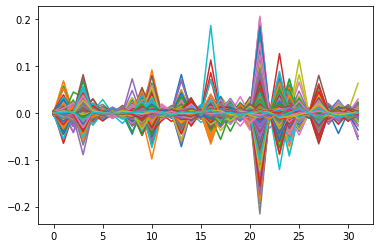

In [6]:
print(plt.plot(alpha_mean.reshape(32,-1)))

[<matplotlib.lines.Line2D object at 0x0000024FEF6AEE08>, <matplotlib.lines.Line2D object at 0x0000024FEF6AE148>, <matplotlib.lines.Line2D object at 0x0000024FEF6BF488>, <matplotlib.lines.Line2D object at 0x0000024FEF6A6708>, <matplotlib.lines.Line2D object at 0x0000024FEF6BF748>, <matplotlib.lines.Line2D object at 0x0000024FEF6BF988>, <matplotlib.lines.Line2D object at 0x0000024FEF6BFB88>, <matplotlib.lines.Line2D object at 0x0000024FEF6BFD88>, <matplotlib.lines.Line2D object at 0x0000024FEF6BF708>, <matplotlib.lines.Line2D object at 0x0000024FEF6BF948>, <matplotlib.lines.Line2D object at 0x0000024FEF6A6D48>, <matplotlib.lines.Line2D object at 0x0000024FEF644388>, <matplotlib.lines.Line2D object at 0x0000024FEF644588>, <matplotlib.lines.Line2D object at 0x0000024FEF644788>, <matplotlib.lines.Line2D object at 0x0000024FEF644988>, <matplotlib.lines.Line2D object at 0x0000024FEF644B88>, <matplotlib.lines.Line2D object at 0x0000024FEF644D88>, <matplotlib.lines.Line2D object at 0x0000024FEF

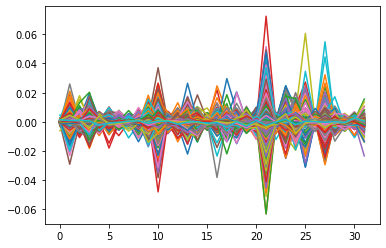

In [7]:
print(plt.plot(beta_mean.reshape(32,-1)))

val

In [35]:
bins = 40
labels = aro
value_lst, bins_edges = np.histogram(labels, bins=bins, range=(1, 10))

def get_bin_idx(label):
    if label == 9:
        return bins - 1
    else:
        return np.where(bins_edges > label)[0][0] - 1

alpha_result = np.empty(shape=(1, 32), dtype=np.float64)
beta_result = np.empty(shape=(1, 32), dtype=np.float64)
label_count = np.empty(shape=(1,), dtype=np.int32)

for idx in range(0, bins):
    where = [get_bin_idx(val) == idx for val in labels]
    alpha_dat = alpha_mean[where]
    beta_dat = beta_mean[where]
    alpha_result = np.append(alpha_result, np.mean(alpha_dat, axis=0).reshape(1,32), axis=0)
    beta_result = np.append(beta_result, np.mean(beta_dat, axis=0).reshape(1,32), axis=0)
    label_count = np.append(label_count, len(alpha_dat))
alpha_result = alpha_result[1:]
beta_result = beta_result[1:]
label_count = label_count[1:]
print(alpha_result.shape, beta_result.shape)

(40, 32) (40, 32)


<BarContainer object of 40 artists>

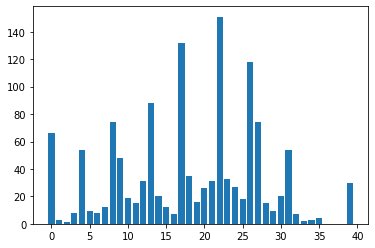

In [36]:
plt.bar(range(bins), label_count)

<BarContainer object of 32 artists>

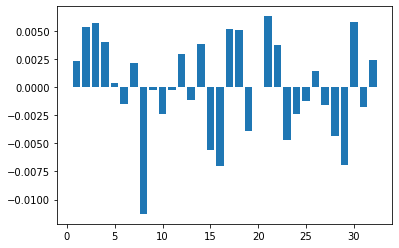

In [37]:
plt.bar(range(1,33), alpha_result[2, :])

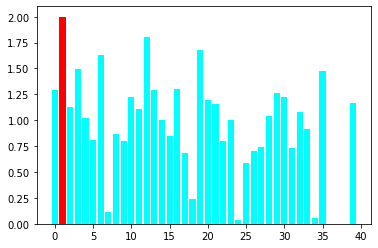

In [38]:
def cos_sim(A, B):
  return np.dot(A, B)/(np.linalg.norm(A)*np.linalg.norm(B))
#val, alpha
anchor = 1
graph = []
for i in range(bins):
    graph.append(cos_sim(alpha_result[anchor], alpha_result[i])+1)
b = np.arange(bins)
c = np.where(b == anchor, 'r', 'aqua')
plt.bar(range(bins), graph, color=c)
plt.show()

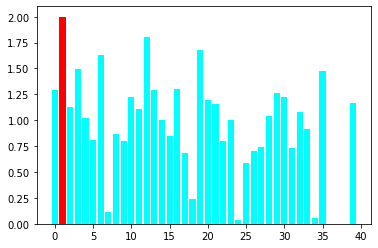

In [39]:
#aro, alpha
anchor = 1
graph = []
for i in range(bins):
    graph.append(cos_sim(alpha_result[anchor], alpha_result[i])+1)
b = np.arange(bins)
c = np.where(b == anchor, 'r', 'aqua')
plt.bar(range(bins), graph, color=c)
plt.show()

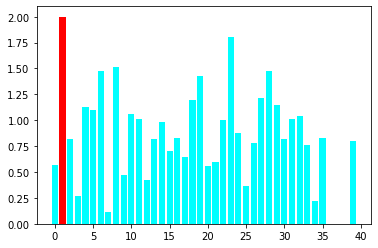

In [40]:
#val, beta
anchor = 1
graph = []
for i in range(bins):
    graph.append(cos_sim(beta_result[anchor], beta_result[i])+1)
b = np.arange(bins)
c = np.where(b == anchor, 'r', 'aqua')
plt.bar(range(bins), graph, color=c)
plt.show()

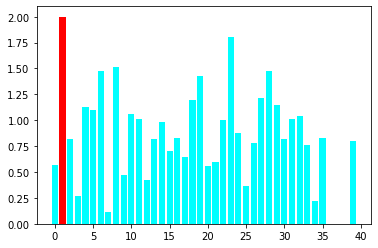

In [41]:
#aro, beta
anchor = 1
graph = []
for i in range(bins):
    graph.append(cos_sim(beta_result[anchor], beta_result[i])+1)
b = np.arange(bins)
c = np.where(b == anchor, 'r', 'aqua')
plt.bar(range(bins), graph, color=c)
plt.show()

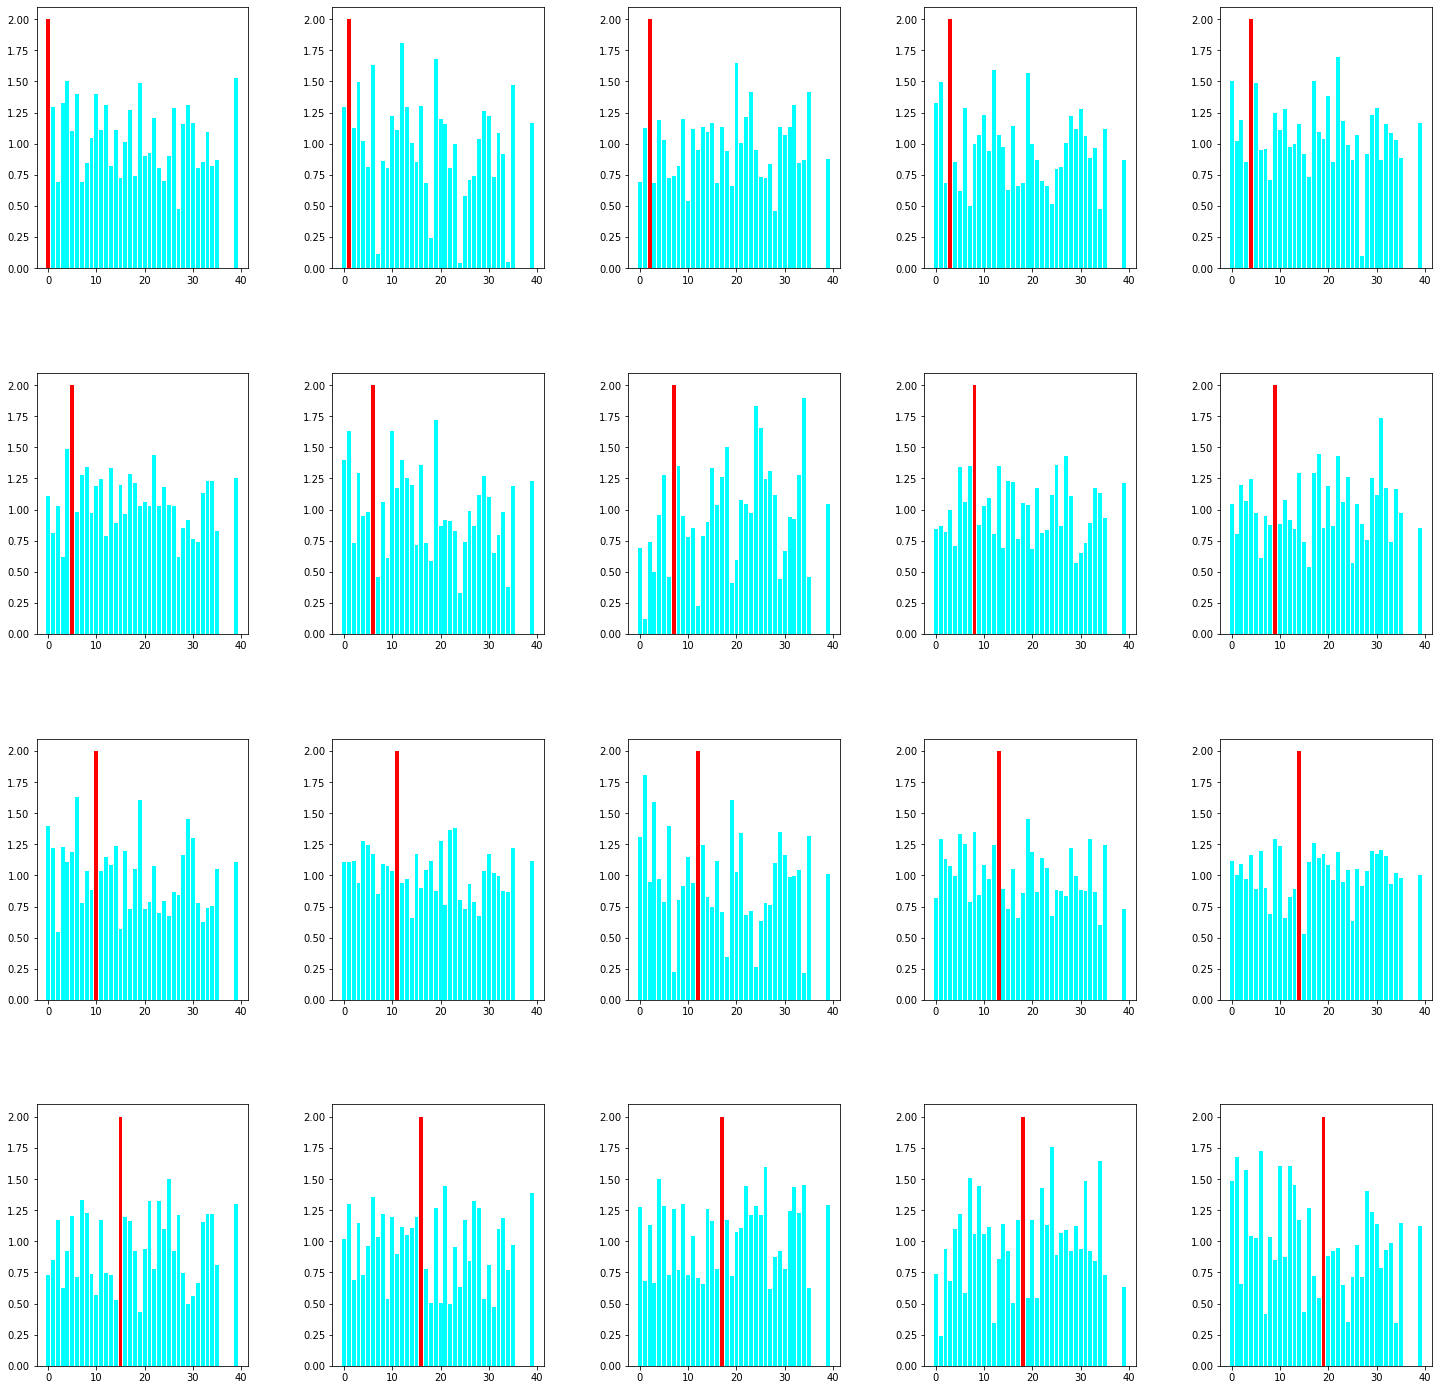

In [45]:
f, ax = plt.subplots(4,5)
f.set_size_inches((5*5, 5*5))
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
for x in range(4):
    for y in range(5):
        anchor = x*5+y
        graph = []
        for i in range(bins):
            graph.append(cos_sim(alpha_result[anchor], alpha_result[i])+1)
        b = np.arange(bins)
        c = np.where(b == anchor, 'r', 'aqua')
        ax[x,y].bar(range(bins), graph, color=c)
plt.show()
# TODO 각 라벨별 개수 세기

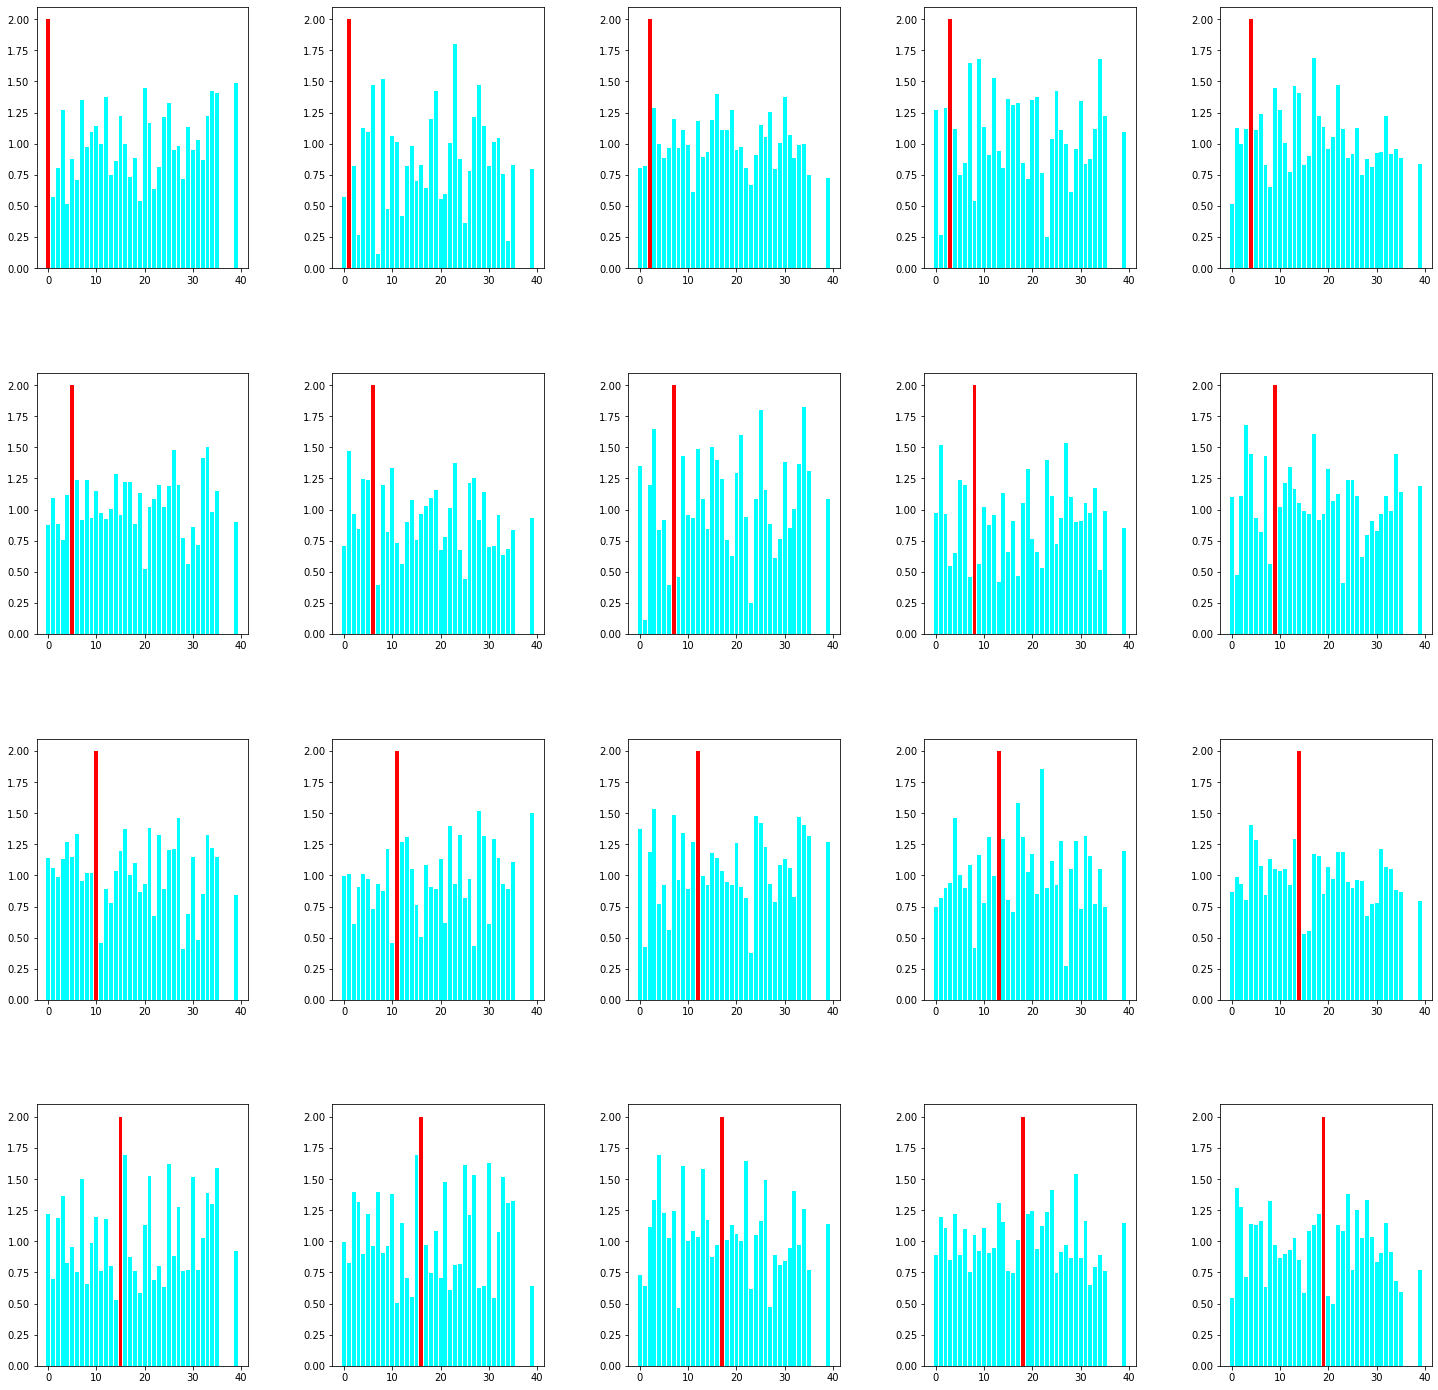

In [43]:
f, ax = plt.subplots(4,5)
f.set_size_inches((5*5, 5*5))
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
for x in range(4):
    for y in range(5):
        anchor = x*5+y
        graph = []
        for i in range(bins):
            graph.append(cos_sim(beta_result[anchor], beta_result[i])+1)
        b = np.arange(bins)
        c = np.where(b == anchor, 'r', 'aqua')
        ax[x,y].bar(range(bins), graph, color=c)
plt.show()
# TODO 각 라벨별 개수 세기

---

### val, aro 나누기

In [24]:
label

array([[8., 8.],
       [9., 8.],
       [9., 8.],
       ...,
       [4., 8.],
       [4., 8.],
       [8., 5.]])

In [25]:
eeg_data = data[:][:32][:]
eeg_data.shape

(32, 32, 8064)

In [27]:
for x in range(0, 10, 1):
    start, end = x, x+1
    val_cond = (val > start) & (val <= end)
    aro_cond = (aro > start) & (aro <= end)
    val[val_cond] = end
    aro[aro_cond] = end
print(np.unique(val, return_counts = True))
print(np.unique(aro, return_counts = True))

# Class 불균형

(array([1., 2., 3., 4., 5., 6., 7., 8., 9.]), array([ 46,  67, 109, 145, 205, 169, 178, 220, 141], dtype=int64))
(array([1., 2., 3., 4., 5., 6., 7., 8., 9.]), array([ 50,  60, 116, 150, 167, 213, 231, 196,  97], dtype=int64))


### 데이터 스케일링

In [33]:
mat_data.shape

(1280, 32, 8064)

In [34]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data_scaled = ss.fit_transform(mat_data.reshape(1280,-1))

In [35]:
data_scaled.shape

(1280, 258048)

### target = val

In [36]:
from sklearn.model_selection import train_test_split

train_input_val, test_input_val, train_target_val, test_target_val = train_test_split(data_scaled, val, stratify = val, random_state=42)

In [37]:
print(train_input_val.shape, test_target_val.shape)

(960, 258048) (320,)


### PCA

In [38]:
from sklearn.decomposition import PCA

pca_val = PCA(n_components=0.9)
pca_val.fit(train_input_val)

PCA(n_components=0.9)

In [82]:
print(np.sum(pca_val.explained_variance_ratio_))

0.9000767604680484


In [39]:
print(pca_val.components_.shape)

(432, 258048)


In [40]:
train_input_pca_val = pca_val.transform(train_input_val)
test_input_pca_val = pca_val.transform(test_input_val)
print(train_input_pca_val.shape)
print(test_input_pca_val.shape)

(960, 432)
(320, 432)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr_val = LogisticRegression(max_iter=10000, random_state=42)
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }

gs = GridSearchCV(lr_val, params, scoring='accuracy', n_jobs=-1)
gs.fit(train_input_pca_val, train_target_val)

GridSearchCV(estimator=LogisticRegression(max_iter=10000, random_state=42),
             n_jobs=-1, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

### 로지스틱 회귀

In [45]:
from sklearn.linear_model import LogisticRegression

lr_val = LogisticRegression(max_iter=10000, random_state=42, C=0.001) # 0.8354 0.1718
# lr_val = LogisticRegression(max_iter=10000, random_state=42, C=0.0005) # 0.7687 0.1625
# lr_val = LogisticRegression(max_iter=10000, random_state=42, C=0.005) # 0.9583 0.15625
lr_val.fit(train_input_pca_val, train_target_val)
print(lr_val.score(train_input_pca_val, train_target_val))
print(lr_val.score(test_input_pca_val, test_target_val))

0.775
0.16875


In [46]:
lr_val.predict(test_input_pca_val)

array([5., 6., 7., 7., 6., 8., 5., 5., 5., 5., 6., 7., 4., 7., 7., 7., 5.,
       5., 4., 5., 4., 8., 5., 7., 5., 6., 6., 8., 8., 5., 6., 7., 5., 8.,
       8., 8., 9., 4., 4., 6., 7., 5., 5., 8., 8., 5., 7., 5., 7., 6., 8.,
       6., 7., 5., 4., 4., 8., 7., 8., 6., 4., 8., 7., 8., 7., 8., 5., 7.,
       8., 8., 5., 8., 5., 8., 5., 5., 8., 6., 8., 9., 5., 8., 6., 5., 4.,
       8., 8., 7., 5., 8., 7., 8., 5., 8., 6., 8., 7., 8., 8., 8., 7., 5.,
       5., 5., 5., 5., 7., 8., 9., 5., 8., 8., 5., 5., 8., 7., 8., 5., 6.,
       8., 9., 5., 8., 5., 5., 5., 5., 8., 4., 5., 8., 9., 6., 4., 5., 8.,
       5., 7., 6., 8., 7., 5., 5., 8., 5., 5., 5., 5., 5., 6., 5., 4., 5.,
       8., 5., 8., 6., 7., 5., 8., 8., 8., 6., 6., 4., 8., 8., 9., 5., 6.,
       4., 4., 8., 6., 8., 3., 9., 9., 5., 8., 8., 4., 3., 7., 5., 5., 8.,
       9., 5., 4., 6., 5., 8., 8., 8., 5., 7., 5., 7., 5., 7., 8., 8., 8.,
       5., 4., 5., 8., 5., 8., 6., 7., 6., 8., 8., 5., 5., 5., 5., 4., 6.,
       5., 7., 8., 8., 5.

In [47]:
test_target_val

array([5., 7., 3., 2., 7., 9., 5., 7., 5., 4., 7., 3., 4., 6., 6., 2., 7.,
       8., 4., 9., 8., 8., 8., 5., 4., 7., 5., 5., 9., 9., 5., 2., 3., 4.,
       8., 5., 2., 8., 3., 9., 6., 9., 4., 8., 8., 8., 4., 8., 3., 3., 7.,
       4., 3., 5., 2., 7., 9., 1., 8., 3., 5., 8., 5., 6., 6., 7., 6., 5.,
       6., 9., 4., 6., 8., 7., 4., 7., 7., 6., 7., 8., 6., 3., 2., 3., 6.,
       1., 7., 7., 6., 4., 2., 5., 2., 1., 5., 4., 6., 5., 3., 8., 8., 9.,
       5., 4., 6., 3., 5., 9., 5., 4., 7., 9., 6., 3., 5., 5., 6., 4., 6.,
       5., 2., 6., 9., 7., 2., 7., 5., 5., 7., 6., 8., 4., 5., 5., 6., 7.,
       5., 8., 8., 6., 5., 7., 6., 5., 3., 3., 6., 2., 1., 2., 8., 4., 6.,
       8., 9., 8., 2., 1., 4., 6., 5., 9., 7., 8., 4., 8., 8., 8., 5., 9.,
       8., 9., 6., 7., 6., 1., 7., 9., 7., 8., 4., 8., 8., 5., 4., 5., 6.,
       8., 5., 3., 2., 9., 3., 8., 4., 8., 7., 8., 4., 9., 7., 8., 5., 5.,
       5., 4., 2., 8., 7., 8., 8., 5., 7., 6., 1., 6., 7., 5., 6., 7., 5.,
       9., 3., 3., 3., 7.

### 혼동행렬

In [48]:
from sklearn.metrics import confusion_matrix

val_true = test_target_val
val_pred = lr_val.predict(test_input_pca_val)
target_names = [np.arange(1,10,1)]
cm_val = confusion_matrix(val_true, val_pred)
val_acc = cm_val.diagonal()/cm_val.sum(axis=1)
print(val_acc*100)

[ 0.          0.          0.         13.88888889 31.37254902  7.14285714
 13.33333333 40.          5.71428571]


In [50]:
sum(cm_val.diagonal()/cm_val.sum(axis=1))

1.1145191409897293

In [51]:
cm_val.diagonal()

array([ 0,  0,  0,  5, 16,  3,  6, 22,  2], dtype=int64)

In [52]:
cm_val.sum(axis=1)

array([12, 17, 27, 36, 51, 42, 45, 55, 35], dtype=int64)

In [53]:
print(cm_val)

[[ 0  0  1  1  4  0  2  4  0]
 [ 0  0  0  1  5  4  5  0  2]
 [ 0  0  0  4 10  2  6  5  0]
 [ 0  0  1  5 14  4  4  6  2]
 [ 0  0  0  2 16  7 10 14  2]
 [ 0  0  0  1 18  3  9 11  0]
 [ 0  0  0  4 13 10  6 11  1]
 [ 0  1  1  6 14  4  3 22  4]
 [ 0  0  0  2 11  2  4 14  2]]


In [54]:
from sklearn.metrics import classification_report

target_names = [str(i) for i in range(1,10)]
print(classification_report(val_true, val_pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        12
           2     0.0000    0.0000    0.0000        17
           3     0.0000    0.0000    0.0000        27
           4     0.1923    0.1389    0.1613        36
           5     0.1524    0.3137    0.2051        51
           6     0.0833    0.0714    0.0769        42
           7     0.1224    0.1333    0.1277        45
           8     0.2529    0.4000    0.3099        55
           9     0.1538    0.0571    0.0833        35

    accuracy                         0.1688       320
   macro avg     0.1064    0.1238    0.1071       320
weighted avg     0.1344    0.1688    0.1413       320



C:\Users\Kong JiYun\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kong JiYun\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kong JiYun\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

### target = aro

In [55]:
from sklearn.model_selection import train_test_split

train_input_aro, test_input_aro, train_target_aro, test_target_aro = train_test_split(data_scaled, aro, stratify = aro, random_state=42)
print(train_input_aro.shape, test_target_aro.shape)

(960, 258048) (320,)


In [56]:
from sklearn.decomposition import PCA

pca_aro = PCA(n_components=0.9)
pca_aro.fit(train_input_aro)

PCA(n_components=0.9)

In [59]:
print(pca_aro.components_.shape)

(436, 258048)


In [58]:
train_input_pca_aro = pca_aro.transform(train_input_aro)
test_input_pca_aro = pca_aro.transform(test_input_aro)
print(train_input_pca_aro.shape)
print(test_input_pca_aro.shape)

(960, 436)
(320, 436)


In [60]:
from sklearn.linear_model import LogisticRegression

# lr_aro = LogisticRegression(max_iter=10000, random_state=42) # C=1 #1.0 #0.1437
# lr_aro = LogisticRegression(max_iter=10000, random_state=42, C=0.001) # 0.83125 0.16875
# lr_aro = LogisticRegression(max_iter=10000, random_state=42, C=0.0005) # 0.7718 0.175
# lr_aro = LogisticRegression(max_iter=10000, random_state=42, C=0.00005) # 0.6479 0.1875
lr_aro = LogisticRegression(max_iter=10000, random_state=42, C=0.000005) # 0.55 0.19
# lr_aro = LogisticRegression(max_iter=10000, random_state=42, C=0.0000005) # 0.309 0.1875
 
lr_aro.fit(train_input_pca_aro, train_target_aro)
print(lr_aro.score(train_input_pca_aro, train_target_aro))
print(lr_aro.score(test_input_pca_aro, test_target_aro))

0.5333333333333333
0.184375


In [61]:
from sklearn.metrics import confusion_matrix

aro_true = test_target_aro
aro_pred = lr_aro.predict(test_input_pca_aro)
target_names = [np.arange(1,10,1)]
cm_aro = confusion_matrix(aro_true, aro_pred)
aro_acc = cm_aro.diagonal()/cm_aro.sum(axis=1)
print(aro_acc*100)
print(sum(aro_acc))

[ 0.          0.          0.          0.          0.         18.86792453
 77.5862069   8.16326531  0.        ]
1.0461739673097608


In [62]:
cm_aro

array([[ 0,  0,  0,  0,  0,  0, 12,  0,  0],
       [ 0,  0,  0,  1,  0,  1, 12,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 27,  1,  0],
       [ 0,  0,  0,  0,  0,  6, 31,  1,  0],
       [ 0,  0,  0,  0,  0,  8, 32,  2,  0],
       [ 0,  0,  0,  0,  0, 10, 43,  0,  0],
       [ 0,  0,  0,  0,  0, 11, 45,  2,  0],
       [ 0,  0,  0,  0,  0,  3, 42,  4,  0],
       [ 0,  0,  0,  0,  1,  5, 17,  1,  0]], dtype=int64)

###### from sklearn.metrics import classification_report

target_names = [str(i) for i in range(1,10)]
print(classification_report(aro_true, aro_pred, target_names=target_names, digits=4))

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://stackoverflow.com/questions/39770376/scikit-learn-get-accuracy-scores-for-each-class

## Support Vector Machines

### linear 

In [64]:
from sklearn.svm import SVC

svm_val = SVC(kernel='linear')
svm_val.fit(train_input_pca_val, train_target_val)

SVC(kernel='linear')

In [65]:
print(svm_val.score(train_input_pca_val, train_target_val))
print(svm_val.score(test_input_pca_val, test_target_val))

1.0
0.10625


### arousal

In [66]:
from sklearn.svm import SVC

svm_aro = SVC(kernel='linear')
svm_aro.fit(train_input_pca_aro, train_target_aro)
print(svm_aro.score(train_input_pca_aro, train_target_aro))
print(svm_aro.score(test_input_pca_aro, test_target_aro))

1.0
0.1125


In [67]:
from sklearn.svm import SVC

# svm_aro = SVC(kernel='linear', C= 0.00001) # 0.5770 # 0.1875
svm_aro = SVC(kernel='linear', C= 0.00002) # 0.6187 # 0.2
# svm_aro = SVC(kernel='linear', C= 0.00003) # 0.6375 # 0.1875

svm_aro.fit(train_input_pca_aro, train_target_aro)
print(svm_aro.score(train_input_pca_aro, train_target_aro))
print(svm_aro.score(test_input_pca_aro, test_target_aro))

0.5770833333333333
0.184375


In [68]:
from sklearn.metrics import classification_report

aro_true = test_target_aro
aro_pred = svm_aro.predict(test_input_pca_aro)
target_names = [str(i) for i in range(1,10)]
print(classification_report(aro_true, aro_pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        12
           2     0.0000    0.0000    0.0000        15
           3     0.0000    0.0000    0.0000        29
           4     0.0000    0.0000    0.0000        38
           5     0.0000    0.0000    0.0000        42
           6     0.1659    0.6792    0.2667        53
           7     0.2200    0.3793    0.2785        58
           8     0.3333    0.0204    0.0385        49
           9     0.0000    0.0000    0.0000        24

    accuracy                         0.1844       320
   macro avg     0.0799    0.1199    0.0648       320
weighted avg     0.1184    0.1844    0.1005       320



C:\Users\Kong JiYun\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kong JiYun\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kong JiYun\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [69]:
from sklearn.metrics import confusion_matrix

aro_true = test_target_aro
aro_pred = svm_aro.predict(test_input_pca_aro)
target_names = [np.arange(1,10,1)]
cm_aro = confusion_matrix(aro_true, aro_pred)
aro_acc = cm_aro.diagonal()/cm_aro.sum(axis=1)
print(aro_acc)

[0.         0.         0.         0.         0.         0.67924528
 0.37931034 0.02040816 0.        ]


In [70]:
for true, pred in zip(aro_true, aro_pred):
    print(true,pred)

3.0 6.0
9.0 7.0
4.0 7.0
2.0 7.0
4.0 6.0
7.0 8.0
8.0 7.0
4.0 6.0
6.0 6.0
7.0 6.0
7.0 7.0
7.0 6.0
3.0 6.0
5.0 6.0
5.0 6.0
5.0 6.0
7.0 6.0
3.0 6.0
6.0 6.0
7.0 7.0
8.0 6.0
6.0 6.0
3.0 6.0
5.0 7.0
5.0 6.0
3.0 7.0
6.0 7.0
7.0 6.0
4.0 7.0
4.0 7.0
7.0 6.0
8.0 6.0
9.0 6.0
6.0 7.0
7.0 6.0
9.0 6.0
2.0 6.0
8.0 6.0
7.0 7.0
2.0 6.0
8.0 7.0
2.0 6.0
1.0 7.0
4.0 6.0
4.0 6.0
6.0 6.0
9.0 6.0
8.0 6.0
4.0 6.0
8.0 7.0
6.0 6.0
3.0 6.0
8.0 8.0
1.0 6.0
4.0 6.0
1.0 6.0
5.0 6.0
8.0 6.0
3.0 7.0
7.0 6.0
7.0 6.0
4.0 7.0
4.0 6.0
7.0 6.0
9.0 7.0
3.0 7.0
8.0 6.0
5.0 7.0
3.0 6.0
6.0 6.0
2.0 7.0
5.0 6.0
5.0 7.0
4.0 6.0
8.0 7.0
5.0 7.0
6.0 6.0
8.0 6.0
6.0 7.0
3.0 7.0
3.0 6.0
2.0 6.0
6.0 6.0
4.0 6.0
3.0 6.0
9.0 6.0
6.0 6.0
4.0 6.0
6.0 7.0
2.0 6.0
7.0 7.0
7.0 6.0
7.0 6.0
6.0 6.0
5.0 6.0
4.0 6.0
6.0 6.0
7.0 6.0
7.0 6.0
9.0 6.0
5.0 6.0
5.0 7.0
5.0 6.0
8.0 7.0
6.0 6.0
4.0 6.0
8.0 6.0
8.0 6.0
9.0 6.0
9.0 6.0
5.0 6.0
6.0 7.0
3.0 7.0
8.0 7.0
7.0 7.0
2.0 6.0
3.0 6.0
5.0 7.0
5.0 6.0
1.0 6.0
5.0 6.0
7.0 6.0
9.0 6.0
6.0 6.0
8.0 6.0


In [71]:
from sklearn.svm import SVC


svm_val = SVC(kernel='linear', C=0.000008) 
svm_val.fit(train_input_pca_val, train_target_val)
print(svm_val.score(train_input_pca_val, train_target_val))
print(svm_val.score(test_input_pca_val, test_target_val))

0.5291666666666667
0.175


In [72]:
svm_val = SVC(kernel='linear', C=0.000005) 
svm_val.fit(train_input_pca_val, train_target_val)
print(svm_val.score(train_input_pca_val, train_target_val))
print(svm_val.score(test_input_pca_val, test_target_val))

0.45729166666666665
0.171875


In [73]:
10**(-5)*5

5e-05

In [74]:
10**(-6)

1e-06

In [76]:
np.arange(0.0000001,0.00001,0.0000001)

array([1.0e-07, 2.0e-07, 3.0e-07, 4.0e-07, 5.0e-07, 6.0e-07, 7.0e-07,
       8.0e-07, 9.0e-07, 1.0e-06, 1.1e-06, 1.2e-06, 1.3e-06, 1.4e-06,
       1.5e-06, 1.6e-06, 1.7e-06, 1.8e-06, 1.9e-06, 2.0e-06, 2.1e-06,
       2.2e-06, 2.3e-06, 2.4e-06, 2.5e-06, 2.6e-06, 2.7e-06, 2.8e-06,
       2.9e-06, 3.0e-06, 3.1e-06, 3.2e-06, 3.3e-06, 3.4e-06, 3.5e-06,
       3.6e-06, 3.7e-06, 3.8e-06, 3.9e-06, 4.0e-06, 4.1e-06, 4.2e-06,
       4.3e-06, 4.4e-06, 4.5e-06, 4.6e-06, 4.7e-06, 4.8e-06, 4.9e-06,
       5.0e-06, 5.1e-06, 5.2e-06, 5.3e-06, 5.4e-06, 5.5e-06, 5.6e-06,
       5.7e-06, 5.8e-06, 5.9e-06, 6.0e-06, 6.1e-06, 6.2e-06, 6.3e-06,
       6.4e-06, 6.5e-06, 6.6e-06, 6.7e-06, 6.8e-06, 6.9e-06, 7.0e-06,
       7.1e-06, 7.2e-06, 7.3e-06, 7.4e-06, 7.5e-06, 7.6e-06, 7.7e-06,
       7.8e-06, 7.9e-06, 8.0e-06, 8.1e-06, 8.2e-06, 8.3e-06, 8.4e-06,
       8.5e-06, 8.6e-06, 8.7e-06, 8.8e-06, 8.9e-06, 9.0e-06, 9.1e-06,
       9.2e-06, 9.3e-06, 9.4e-06, 9.5e-06, 9.6e-06, 9.7e-06, 9.8e-06,
       9.9e-06])

In [77]:
print(gs.best_params_)
print(gs.best_score_)

{'C': 0.001}
0.14583333333333331


In [78]:
svm_val = gs.best_estimator_
print(svm_val.score(train_input_pca_val, train_target_val))
print(svm_val.score(test_input_pca_val, test_target_val))

0.775
0.16875


In [79]:
len(np.arange(0.0000001,0.00001,0.0000001))

99

In [80]:
from sklearn.model_selection import GridSearchCV

svm_val = SVC(kernel='linear') 
params = {'C': np.arange(0.0000001,0.00001,0.0000001) }

gs = GridSearchCV(svm_val, params, scoring='accuracy', n_jobs=-1)
gs.fit(train_input_pca_val, train_target_val)

GridSearchCV(estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1.0e-07, 2.0e-07, 3.0e-07, 4.0e-07, 5.0e-07, 6.0e-07, 7.0e-07,
       8.0e-07, 9.0e-07, 1.0e-06, 1.1e-06, 1.2e-06, 1.3e-06, 1.4e-06,
       1.5e-06, 1.6e-06, 1.7e-06, 1.8e-06, 1.9e-06, 2.0e-06, 2.1e-06,
       2.2e-06, 2.3e-06, 2.4e-06, 2.5e-06, 2.6e-06, 2.7e-06, 2.8e-06,
       2.9e-06, 3.0e-06, 3.1e-06, 3.2e-06, 3.3e-06, 3.4e-06, 3...
       5.7e-06, 5.8e-06, 5.9e-06, 6.0e-06, 6.1e-06, 6.2e-06, 6.3e-06,
       6.4e-06, 6.5e-06, 6.6e-06, 6.7e-06, 6.8e-06, 6.9e-06, 7.0e-06,
       7.1e-06, 7.2e-06, 7.3e-06, 7.4e-06, 7.5e-06, 7.6e-06, 7.7e-06,
       7.8e-06, 7.9e-06, 8.0e-06, 8.1e-06, 8.2e-06, 8.3e-06, 8.4e-06,
       8.5e-06, 8.6e-06, 8.7e-06, 8.8e-06, 8.9e-06, 9.0e-06, 9.1e-06,
       9.2e-06, 9.3e-06, 9.4e-06, 9.5e-06, 9.6e-06, 9.7e-06, 9.8e-06,
       9.9e-06])},
             scoring='accuracy')

In [81]:
from sklearn.svm import SVC
# pca 830개
svm_val = SVC(kernel='linear', C=0.000005) # 0.5 0.2
svm_val.fit(train_input_pca_val, train_target_val)
print(svm_val.score(train_input_pca_val, train_target_val))
print(svm_val.score(test_input_pca_val, test_target_val))

0.45729166666666665
0.171875


In [129]:
from sklearn.svm import SVC
# pca 830개
svm_val = SVC(kernel='linear', C=0.00001)
svm_val.fit(train_input_pca_val, train_target_val)
print(svm_val.score(train_input_pca_val, train_target_val))
print(svm_val.score(test_input_pca_val, test_target_val))

0.828125
0.203125


In [99]:
# svm_aro = SVC(kernel='linear') # 1.0 0.1218
# svm_aro = SVC(kernel='linear', C=0.0001) # 0.70 0.18
svm_aro = SVC(kernel='linear', C=0.000005) # 0.5 0.17 
svm_aro.fit(train_input_pca_aro, train_target_aro)
print(svm_aro.score(train_input_pca_aro, train_target_aro))
print(svm_aro.score(test_input_pca_aro, test_target_aro))

0.5125
0.171875


### rbf

In [106]:
svm_val = SVC(kernel='rbf')
svm_val.fit(train_input_pca_val, train_target_val)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [107]:
print(svm_val.score(train_input_pca_val, train_target_val))
print(svm_val.score(test_input_pca_val, test_target_val))

0.5145833333333333
0.190625


In [102]:
svm_val = SVC(kernel='sigmoid')
svm_val.fit(train_input_pca_val, train_target_val)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [103]:
print(svm_val.score(train_input_pca_val, train_target_val))
print(svm_val.score(test_input_pca_val, test_target_val))

0.3375
0.184375


In [104]:
svm_val = SVC(kernel='poly')
svm_val.fit(train_input_pca_val, train_target_val)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [105]:
print(svm_val.score(train_input_pca_val, train_target_val))
print(svm_val.score(test_input_pca_val, test_target_val))

0.415625
0.16875


## PCA 적당히

In [110]:
train_input_val.shape

(960, 322560)

In [111]:
from sklearn.decomposition import PCA

pca_val = PCA(n_components=0.99)
pca_val.fit(train_input_val)
print(pca_val.components_.shape)

(830, 322560)


In [112]:
train_input_pca_val = pca_val.transform(train_input_val)
test_input_pca_val = pca_val.transform(test_input_val)
print(train_input_pca_val.shape)
print(test_input_pca_val.shape)

(960, 830)
(320, 830)


In [122]:
svm_val = SVC(kernel='rbf', C=1)
svm_val.fit(train_input_pca_val, train_target_val)
print(svm_val.score(train_input_pca_val, train_target_val))
print(svm_val.score(test_input_pca_val, test_target_val))

0.5677083333333334
0.18125


In [118]:
svm_val = SVC(kernel='rbf', C=2)
svm_val.fit(train_input_pca_val, train_target_val)
print(svm_val.score(train_input_pca_val, train_target_val))
print(svm_val.score(test_input_pca_val, test_target_val))

0.8364583333333333
0.171875


In [44]:
from sklearn.metrics import classification_report

val_true = test_target_val
val_pred = svm_val.predict(test_input_pca_val)
target_names = [str(i) for i in range(1,10)]
print(classification_report(val_true, val_pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        12
           2     0.0000    0.0000    0.0000        17
           3     0.0000    0.0000    0.0000        27
           4     0.5000    0.0278    0.0526        36
           5     0.1983    0.4510    0.2754        51
           6     0.0000    0.0000    0.0000        42
           7     0.0000    0.0000    0.0000        45
           8     0.2031    0.7091    0.3158        55
           9     1.0000    0.0286    0.0556        35

    accuracy                         0.2000       320
   macro avg     0.2113    0.1352    0.0777       320
weighted avg     0.2321    0.2000    0.1102       320



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
from sklearn.metrics import confusion_matrix

val_true = test_target_val
val_pred = svm_val.predict(test_input_pca_val)
target_names = [np.arange(1,10,1)]
cm_val = confusion_matrix(val_true, val_pred)
val_acc = cm_val.diagonal()/cm_val.sum(axis=1)
print(val_acc)

[0.         0.         0.         0.02777778 0.45098039 0.
 0.         0.70909091 0.02857143]


In [51]:
for true, pred in zip(val_true, val_pred):
    print(true,pred)

5.0 8.0
7.0 8.0
3.0 8.0
2.0 8.0
7.0 5.0
9.0 8.0
5.0 8.0
7.0 8.0
5.0 5.0
4.0 8.0
7.0 8.0
3.0 5.0
4.0 8.0
6.0 5.0
6.0 8.0
2.0 5.0
7.0 5.0
8.0 5.0
4.0 4.0
9.0 8.0
8.0 8.0
8.0 5.0
8.0 8.0
5.0 8.0
4.0 8.0
7.0 8.0
5.0 8.0
5.0 8.0
9.0 8.0
9.0 8.0
5.0 5.0
2.0 8.0
3.0 8.0
4.0 8.0
8.0 8.0
5.0 5.0
2.0 5.0
8.0 5.0
3.0 5.0
9.0 5.0
6.0 7.0
9.0 8.0
4.0 5.0
8.0 8.0
8.0 8.0
8.0 8.0
4.0 5.0
8.0 8.0
3.0 8.0
3.0 8.0
7.0 5.0
4.0 5.0
3.0 5.0
5.0 8.0
2.0 5.0
7.0 5.0
9.0 8.0
1.0 8.0
8.0 8.0
3.0 8.0
5.0 8.0
8.0 8.0
5.0 8.0
6.0 5.0
6.0 8.0
7.0 8.0
6.0 5.0
5.0 8.0
6.0 8.0
9.0 5.0
4.0 5.0
6.0 8.0
8.0 8.0
7.0 5.0
4.0 8.0
7.0 8.0
7.0 8.0
6.0 8.0
7.0 8.0
8.0 8.0
6.0 5.0
3.0 8.0
2.0 5.0
3.0 8.0
6.0 8.0
1.0 8.0
7.0 8.0
7.0 8.0
6.0 8.0
4.0 5.0
2.0 6.0
5.0 7.0
2.0 5.0
1.0 8.0
5.0 5.0
4.0 8.0
6.0 8.0
5.0 8.0
3.0 5.0
8.0 5.0
8.0 8.0
9.0 5.0
5.0 5.0
4.0 8.0
6.0 8.0
3.0 5.0
5.0 7.0
9.0 8.0
5.0 8.0
4.0 8.0
7.0 4.0
9.0 8.0
6.0 8.0
3.0 8.0
5.0 5.0
5.0 5.0
6.0 8.0
4.0 5.0
6.0 8.0
5.0 8.0
2.0 5.0
6.0 5.0
9.0 8.0
7.0 8.0
2.0 8.0


In [50]:
len(val_pred)

320

In [46]:
print(sum(val_acc*100))

121.64205075969782


https://scikit-learn.org/stable/modules/svm.html#classification